In [71]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [72]:
#Loading the data file using pandas

In [73]:
df = pd.read_csv(r"C:\Users\faiza\Desktop\playstore dataset\googleplaystore.csv")

In [74]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
#finding and handling the missing data


In [76]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [77]:
df.shape

(10841, 13)

In [78]:
df.dropna(inplace=True)

In [79]:
df.shape

(9360, 13)

In [80]:
#Size column has characters 'M' and 'k' which represents mega and kilo so we have to remove them and convert
#the values in scale of kilo's(1000's) , after that we will change the data type of Size column to Float64

In [81]:
def change(x):
    if 'M' in x:
        z=x[:-1]
        z=float(z)*1000
        return z
    
    elif 'k' in x:
        z=x[:-1]
        z=float(z)
        return z
    
    else : return None
    
df.Size = df.Size.map(change)   

In [82]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [83]:
#some values are not defined with 'M','k' suffix which were replaced with NaN which have to be filled

In [84]:
df["Size"].isnull().sum()

1637

In [85]:
df["Size"].fillna(method='pad',inplace=True)
df["Size"].isnull().sum()

0

In [86]:
#Now we will change the data type of Reviews , Price and Installs columns to float64 but Price and Installs columns have some
#charecters such as '$' , ',' which has to be replaced


In [87]:
df["Reviews"]=df["Reviews"].astype('float')

In [88]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df.Price=df.Price.astype('float')

In [89]:
df.Installs = df.Installs.apply(lambda x: x.replace(',','').replace('+',''))
df.Installs=df.Installs.astype('float')

In [90]:
#Checking the data types of each column

In [91]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [92]:
df["Rating"].shape

(9360,)

In [93]:
#The maximum and minimum rating alowed in playstore is 5 and 0 respectively so it is not possible 
#to have rating higher tha 5 , if it is true then delete such rows

In [94]:
a=df.Rating>5

In [95]:
a.value_counts()

False    9360
Name: Rating, dtype: int64

In [96]:
#Apps. which are free must have no price value but if they have then delete the rows

In [97]:
b=(df.Type=='Free')&(df.Price>0)

In [98]:
b.value_counts()

False    9360
dtype: int64

In [99]:
# Number of reviews must be less than number of installs because a user can't give a review without
# checking the app but if this is the case then delete the row

In [100]:
c=df.Reviews>df.Installs

In [101]:
c.value_counts()

False    9353
True        7
dtype: int64

In [102]:
df=df[df.Reviews<df.Installs].copy()
print(df.shape)

(9351, 13)


In [103]:
 #univariate analysis

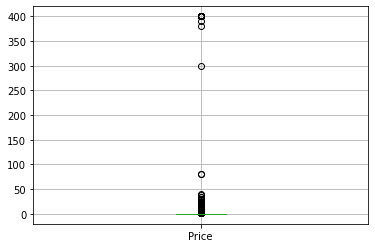

In [104]:
boxplot = df.boxplot(column=['Price'])

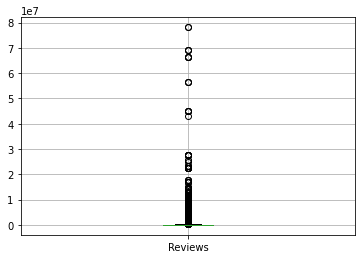

In [105]:
boxplot = df.boxplot(column=['Reviews'])

[[<AxesSubplot:title={'center':'Rating'}>]]


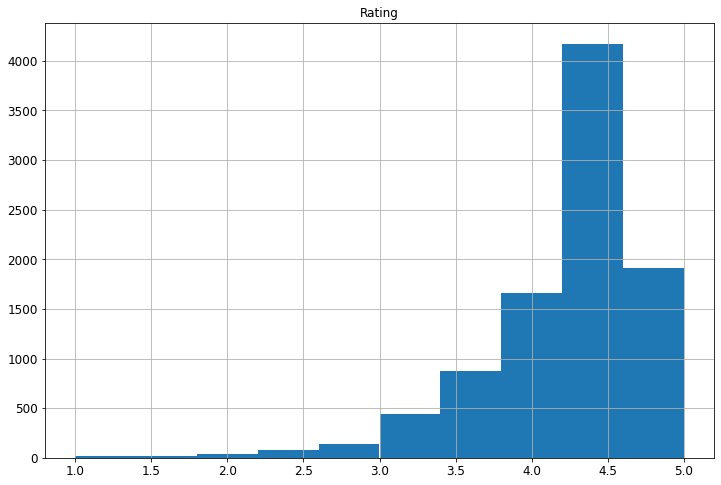

In [106]:
print(df.hist(['Rating'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

[[<AxesSubplot:title={'center':'Size'}>]]


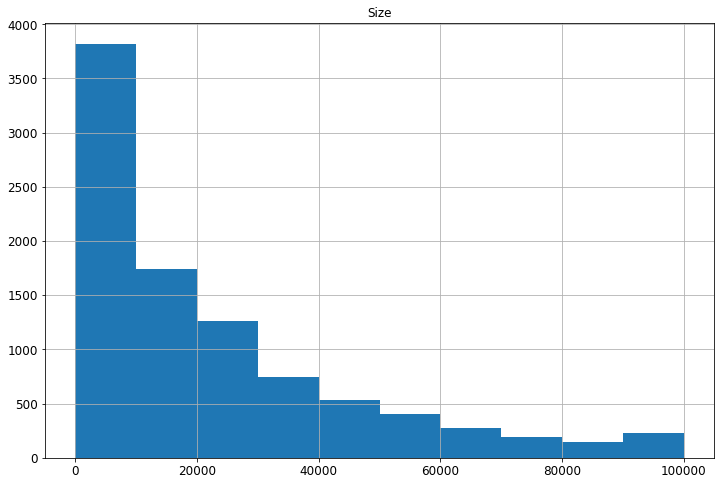

In [107]:
print(df.hist(['Size'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

In [108]:
#outlier treatment
#200 for an app in playstore makes it suspicious so we should conide rapps.
#withprices less than 200 and drop the rest

In [109]:
df=df[df.Price<200].copy()
print(df.shape)

(9336, 13)


In [110]:
#Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, 
#in fact, will skew it. Drop records having more than 2 million reviews.

In [111]:
d = df.Reviews>2000000

In [112]:
d.value_counts()

False    8883
True      453
Name: Reviews, dtype: int64

In [113]:
df=df[df.Reviews<=2000000].copy()
print(df.shape)

(8883, 13)


In [114]:
# Percentiles– 10, 25, 50, 70, 90, 95, 99



In [115]:
percentiles=df[['Rating','Reviews','Size','Installs','Price']]

In [116]:
#10, 25, 50, 70, 90, 95, 99 percentiles
print("10th percentile : ",
       np.percentile(percentiles, 10))

print("25th percentile : ",
       np.percentile(percentiles, 25))

print("50th percentile : ", 
       np.percentile(percentiles, 50))

print("70th percentile : ",
       np.percentile(percentiles, 70))

print("90th percentile : ",
       np.percentile(percentiles, 90))
print("95th percentile : ",
       np.percentile(percentiles, 95))
print("99th percentile  : ",
       np.percentile(percentiles, 99))

10th percentile :  0.0
25th percentile :  4.0
50th percentile :  1000.0
70th percentile :  18000.0
90th percentile :  582505.9999999943
95th percentile :  5000000.0
99th percentile  :  10000000.0


In [117]:
#Bivariate analysis

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


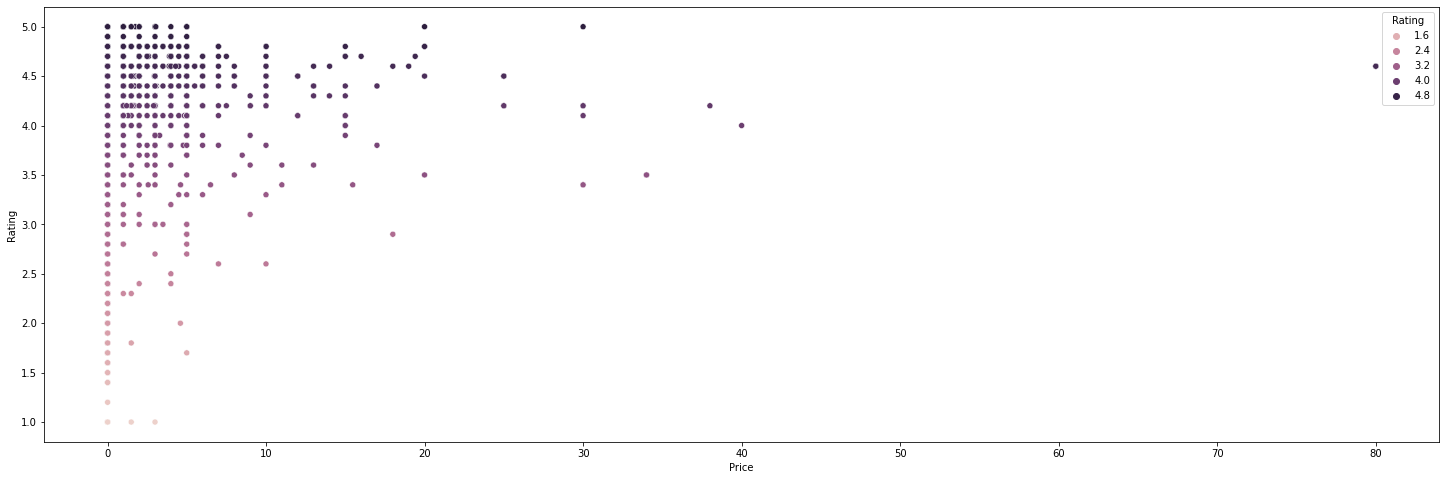

In [118]:
plt.figure(figsize=(25,8))
sns.scatterplot(df.Price,df.Rating,hue=df.Rating)
plt.show()

In [119]:
#Well there is no clear pattern that paid apps get better ratings but apps with minimum price of 
#9$ gets atleast average rating of 2.5

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


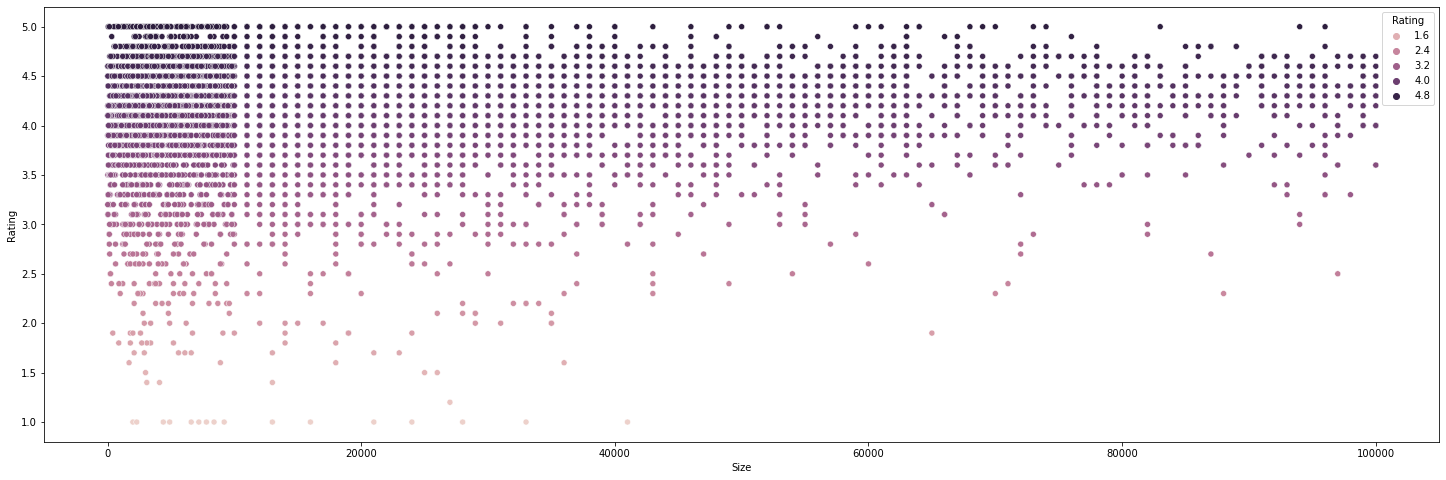

In [120]:
plt.figure(figsize=(25,8))
sns.scatterplot(df.Size,df.Rating,hue=df.Rating)
plt.show()

In [121]:
#This scatterplot also shows that increase in size does not ensure high rating but heavy apps are mostly 
#rated better as compared to lighter apps

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


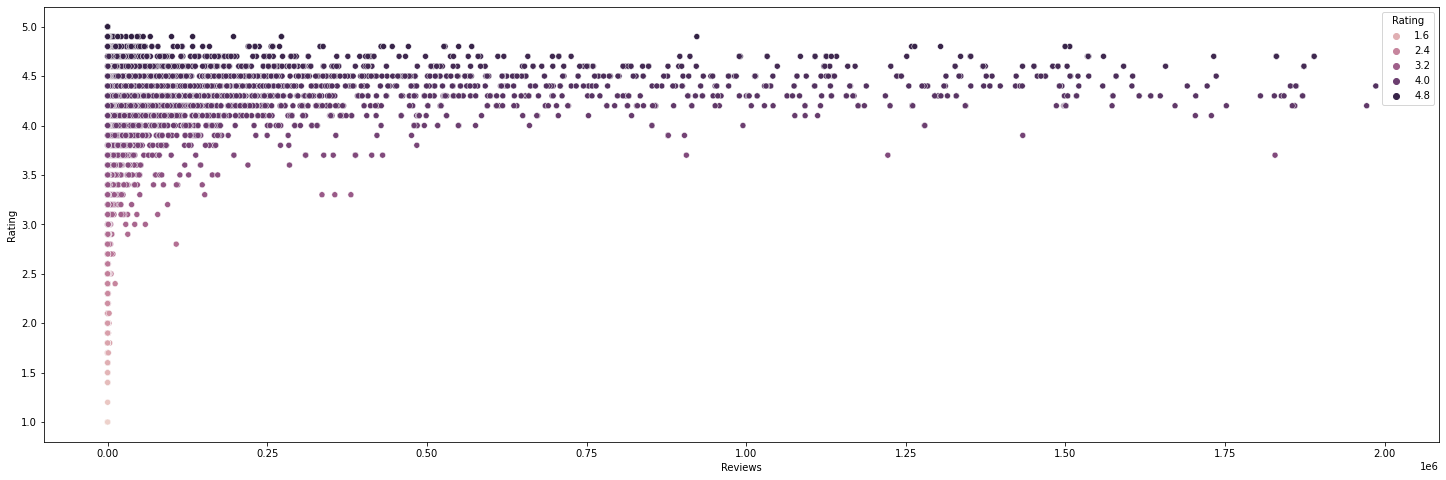

In [122]:
plt.figure(figsize=(25,8))
sns.scatterplot(df.Reviews,df.Rating,hue=df.Rating)
plt.show()

In [123]:
#There is no particular patter that is followed between reviews and rating but we can see that after
#some point rating becomes independent of popularity.

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


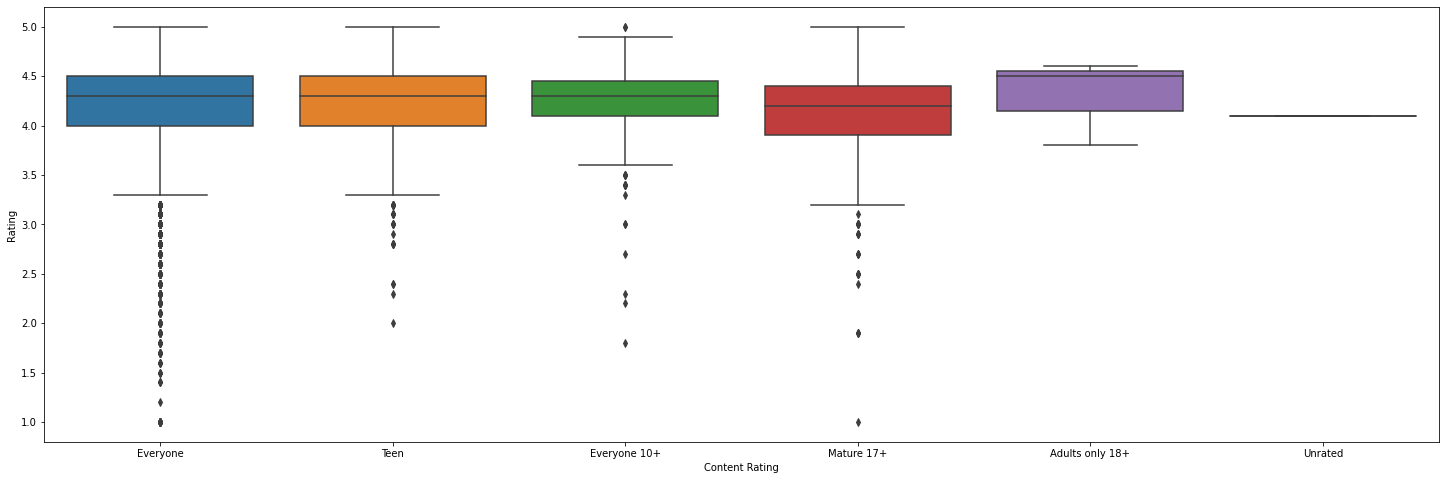

In [124]:
plt.figure(figsize=(25,8))
sns.boxplot(df["Content Rating"],df["Rating"])
plt.show()

In [125]:
#The highest mean rating is gained by "Adults only 18+" apps

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


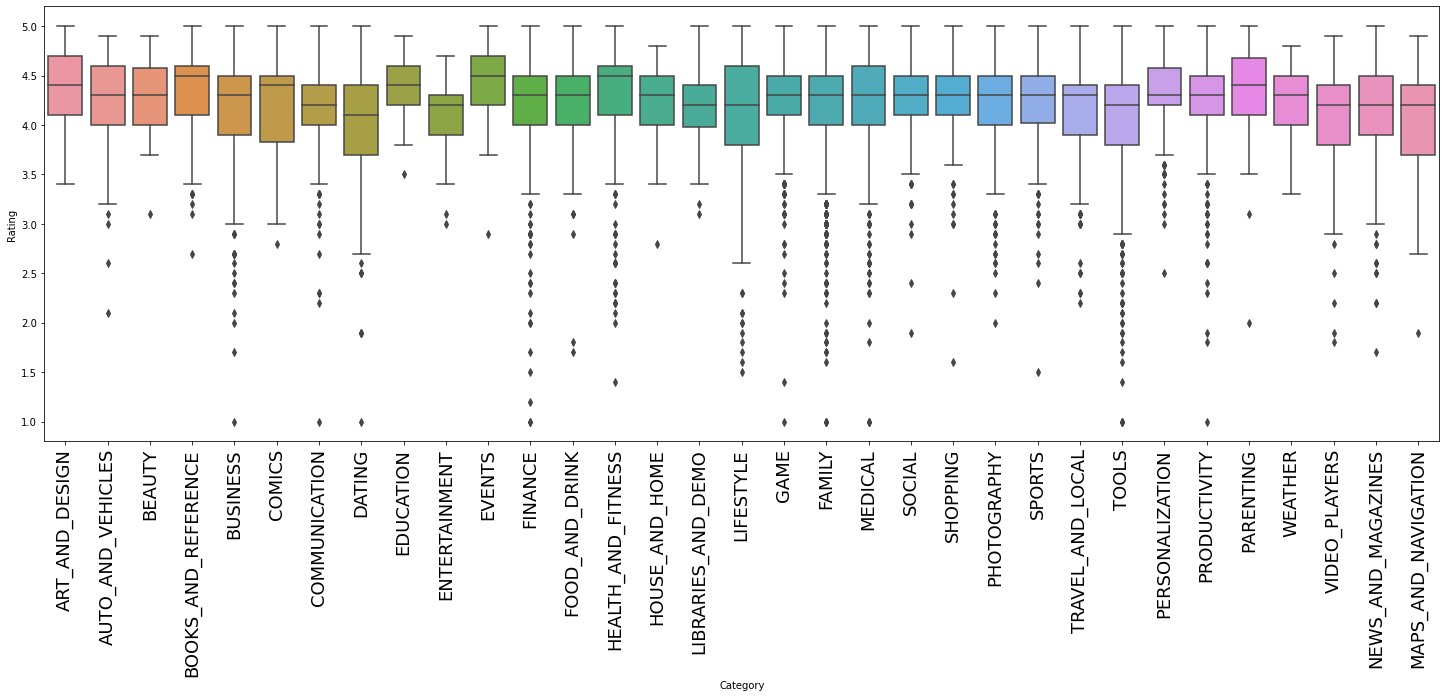

In [126]:
plt.figure(figsize=(25,8))
sns.boxplot(df.Category,df.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.show()

In [127]:
#apps in health & fitness, books and reference category seem to have the highest median ratings.

In [128]:
#data preprocessing

In [129]:
#We can deal with outliers by converting the column into logarithmic fucntion

In [130]:
inp1=df.copy()

array([[<AxesSubplot:title={'center':'Installs'}>,
        <AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

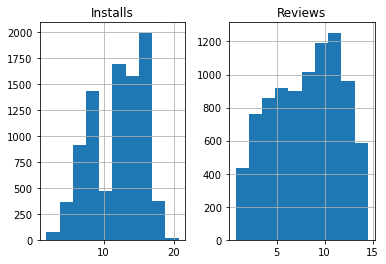

In [131]:
inp1.Installs=inp1.Installs.apply(func=np.log1p)
inp1.Reviews=inp1.Reviews.apply(func=np.log1p)

inp1.hist(column=['Installs','Reviews'])

In [132]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task

In [133]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver"],inplace=True,axis=1)

In [134]:
inp1.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity


In [135]:
#convert the columns with categorical values into dummy variables

In [136]:
inp1=pd.get_dummies(inp1,drop_first=True)

In [139]:
inp2=inp1
        

In [140]:
inp2.head(5)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#define the dependent and independent variable

In [142]:
x=inp2.iloc[:,1:]
y=inp2.iloc[:,:1]


In [143]:
#Do the train test split

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=1)

In [145]:
#Apply linear regression to the training set

In [146]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(x_train, y_train)

In [147]:
#get the prediction for the test set

In [148]:
y_pred=regressor.predict(x_test)

In [149]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [150]:
#Find the value of adjusted R2 , R2 score and RMSE value

In [151]:
summ=OLS( y_train,x_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3712.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:52:07   Log-Likelihood:                         -4297.6
No. Observations:                6218   AIC:                                      8841.
Df Residuals:                    6095   BIC:                                      9670.
Df Model:                         123                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1798      0.006     28.621      0.000       0.167       0.192
Size                                         -5.724e-07   3.33e-07     -1.721      0.085   -1.22e-06    7.95e-08
Installs                                        -0.1524      0.006    -24.474      0.000      -0.165      -0.140
Price                                           -0.0014      0.003     -0.441      0.659      -0.008       0.005
Category_AUTO_AND_VEHICLES                       1.1349      0.166      6.840      0.000       0.810       1.460
Category_BEAUTY                                  1.1830      0.169      7.012      0.000       0.852       1.514
Category_BOOKS_AND_REFERENCE                     1.1287      0.164      6.881      0.000       0.807       1.450
Category_BUSINESS                                1.0390      0.164      6.352      0.000       0.718       1.360
Category_COMICS                                  0.9954      0.167      5.953      0.000       0.668       1.323
Category_COMMUNICATION                           0.9959      0.164      6.084      0.000       0.675       1.317
Category_DATING                                  0.9366      0.165      5.685      0.000       0.614       1.260
Category_EDUCATION                               1.8051      0.329      5.483      0.000       1.160       2.450
Category_ENTERTAINMENT                           1.7293      0.329      5.252      0.000       1.084       2.375
Category_EVENTS                                  1.2092      0.169      7.175      0.000       0.879       1.540
Category_FAMILY                                  1.8466      0.324      5.697      0.000       1.211       2.482
Category_FINANCE                                 1.0171      0.163      6.224      0.000       0.697       1.337
Category_FOOD_AND_DRINK                          1.0292      0.165      6.235      0.000       0.706       1.353
Category_GAME                                    2.0572      0.325      6.324      0.000       1.419       2.695
Category_HEALTH_AND_FITNESS                      1.0594      0.164      6.476      0.000       0.739       1.380
Category_HOUSE_AND_HOME                          1.0792      0.166      6.502      0.000       0.754       1.405
Category_LIBRARIES_AND_DEMO                      1.1220      0.167      6.727      0.000       0.795       1.449
Category_LIFESTYLE                               1.3222      0.272      4.868      0.000       0.790       1.855
Category_MAPS_AND_NAVIGATION                     0.9790      0.165      5.938      0.000       0.656       1.302
Category_MEDICAL                              

In [152]:
#The value of adjusted R2 is around 0.987 which is a very good value, more this value nearer to 1 better is the
#correlation between predicted and test values.